<div style="
    max-width: 950px;
    margin: 20px auto;
    padding: 30px;
    border-radius: 16px;
    background: linear-gradient(135deg, rgb(56, 113, 247), rgb(188, 55, 255)); 
    font-family: 'Times New Roman', Times, serif;
    box-shadow: 0 8px 25px rgba(139, 0, 139, 0.5);
    color: #fff0f5;
    line-height: 1.7;
">

  <!-- The title color is now a solid, opaque gold -->
  <h1 style="font-size: 2.5rem; font-style: italic ; font-weight: 700; margin-bottom: 25px; color: #FFD700; text-align: center;">
    🎲<span style="font-weight: 400;"> Queueing Analysis of a Hospital Emergency Room </span>📊
  </h1>
  <!-- The font-family for the paragraphs now inherits from the parent div and font size is increased -->
  <p style="color: white; font-style: italic; text-align: center; font-size: 1.8rem;">
      Koorosh Asil Gharehbaghi
  </p>
    <p style="color: white; font-style: italic; text-align: center; font-size: 1.8rem;">  
    Computer Science
  </p>
  <p style="color: white; font-style: italic; text-align: center; font-size: 1.8rem;">  
    40124463
  </p>
  <p style="color: white; font-style: italic; text-align: center; font-size: 1.4rem;">
  June 3, 2025 , Spring 2025
  </p>
  <p style="color: white; font-style: italic; text-align: center; font-size: 1.4rem;">
      <strong>Instructor:</strong> Dr. Razieh Khodsiani
  </p>
  <p style="color: white; font-style: italic; text-align: center; font-size: 1.4rem;">
    Department of Computer Science, Faculty of Mathematics
  </p>

</div>


In [ ]:
import matplotlib.pyplot as plt

def plot_er_data_overview(df):
    """
    Takes the ER dataset DataFrame and creates a 3x2 grid of plots:
    - Histogram of Total Wait Time
    - Histogram of Patient Satisfaction
    - Average Total Wait Time by Urgency Level
    - Number of Visits by Day of Week
    - Distribution of Nurse-to-Patient Ratio
    - Distribution of Urgency Levels
    """
    fig, axes = plt.subplots(3, 2, figsize=(14, 12))
    axes = axes.flatten()

    
    axes[0].hist(df['Total Wait Time (min)'], bins=30, edgecolor='black')
    axes[0].set_title('Distribution of Total Wait Time (min)')
    axes[0].set_xlabel('Total Wait Time (min)')
    axes[0].set_ylabel('Number of Visits')

    axes[1].hist(df['Patient Satisfaction'], bins=5, edgecolor='black', color="salmon")
    axes[1].set_title('Distribution of Patient Satisfaction Scores')
    axes[1].set_xlabel('Satisfaction Score')
    axes[1].set_ylabel('Number of Visits')


    avg_wait_by_urgency = df.groupby('Urgency Level')['Total Wait Time (min)'].mean().sort_index()
    avg_wait_by_urgency.plot(kind='bar', ax=axes[2], color='skyblue')
    axes[2].set_title('Average Total Wait Time by Urgency Level')
    axes[2].set_ylabel('Avg Wait Time (min)')

    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    visits_by_day = df['Day of Week'].value_counts().reindex(day_order)
    visits_by_day.plot(kind='bar', ax=axes[3], color='coral')
    axes[3].set_title('Number of Visits by Day of Week')
    axes[3].set_ylabel('Number of Visits')


    nurse_ratio_counts = df['Nurse-to-Patient Ratio'].value_counts().sort_index()
    nurse_ratio_counts.plot(kind='bar', ax=axes[4], color='lightgreen')
    axes[4].set_title('Distribution of Nurse-to-Patient Ratios')
    axes[4].set_xlabel('Nurse-to-Patient Ratio')
    axes[4].set_ylabel('Number of Visits')

    # Distribution of Urgency Levels
    urgency_counts = df['Urgency Level'].value_counts().sort_index()
    urgency_counts.plot(kind='bar', ax=axes[5], color='plum')
    axes[5].set_title('Distribution of Urgency Levels')
    axes[5].set_ylabel('Number of Visits')

    plt.tight_layout()
    plt.show()

import pandas as pd

df = pd.read_csv('./ER Wait Time Dataset.csv', parse_dates=['Visit Date'])

import pandas as pd
import numpy as np

df = pd.read_csv('./ER Wait Time Dataset.csv', parse_dates=['Visit Date'])
df.head(2)


,Visit ID,Patient ID,Hospital ID,Hospital Name,Region,Visit Date,Day of Week,Season,Time of Day,Urgency Level,Nurse-to-Patient Ratio,Specialist Availability,Facility Size (Beds),Time to Registration (min),Time to Triage (min),Time to Medical Professional (min),Total Wait Time (min),Patient Outcome,Patient Satisfaction
0,HOSP-1-20240210-0001,PAT-00001,HOSP-1,Springfield General Hospital,Urban,2024-02-10 20:20:56,Saturday,Winter,Late Morning,Medium,4,3,92,17,22,66,105,Discharged,1
1,HOSP-3-20241128-0001,PAT-00002,HOSP-3,Northside Community Hospital,Rural,2024-11-28 02:07:47,Thursday,Fall,Evening,Medium,4,0,38,9,30,30,69,Discharged,3


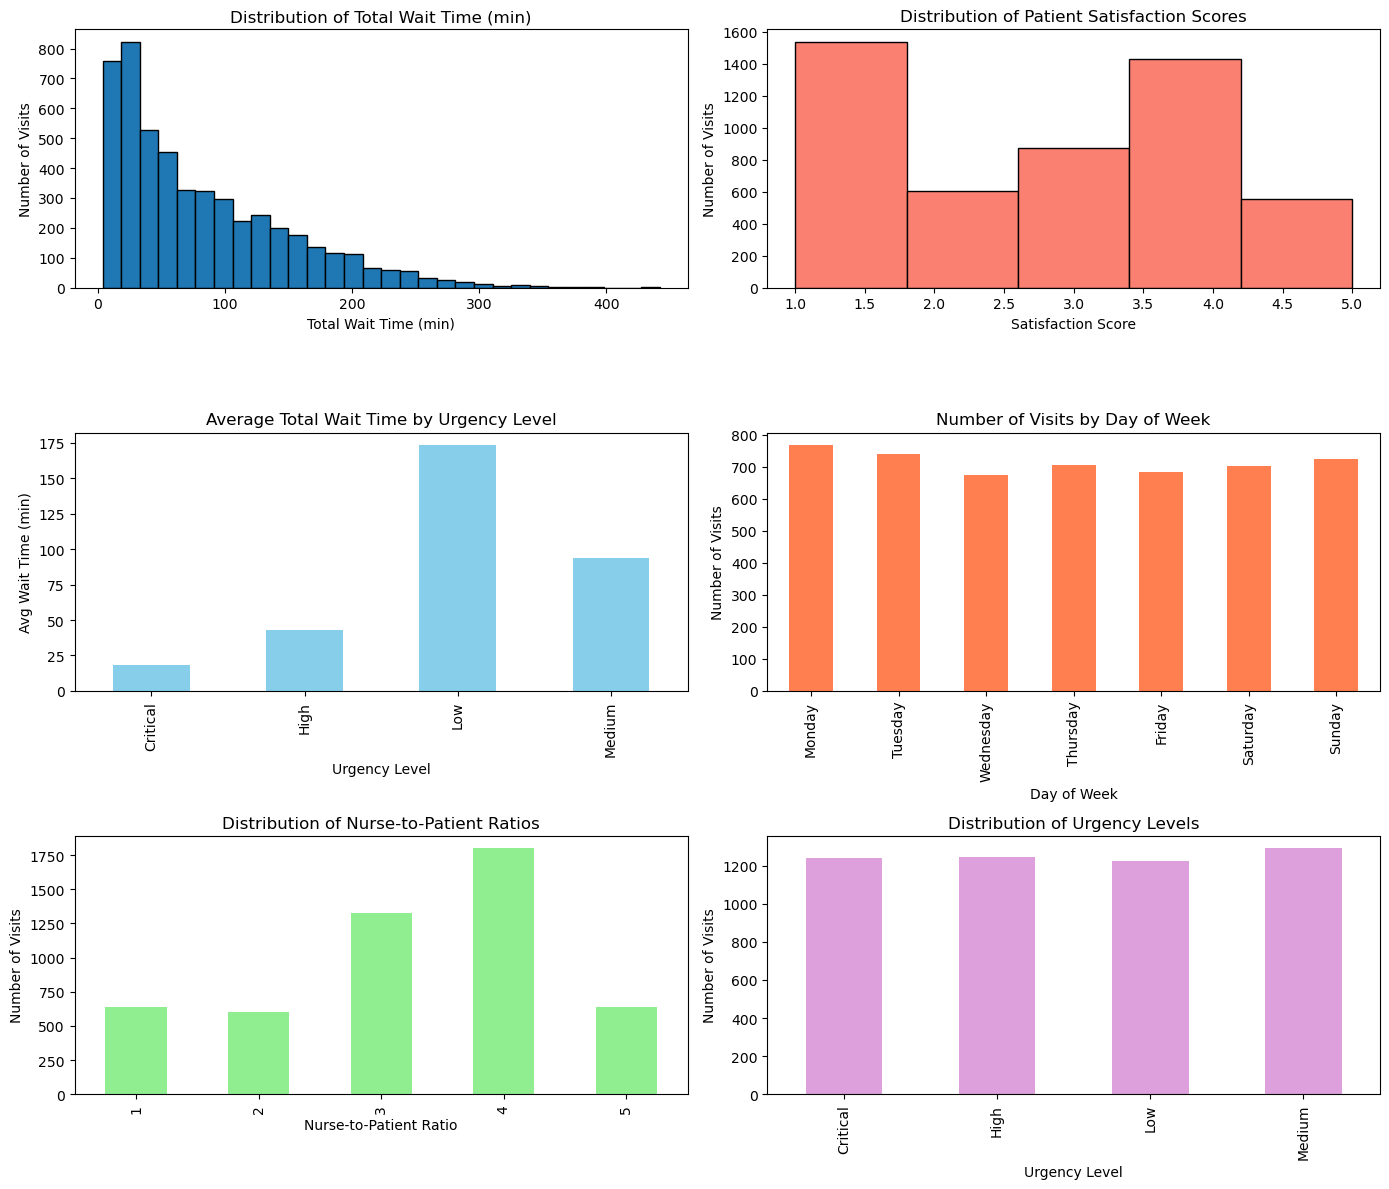

In [2]:
plot_er_data_overview(df)

<div style="
  font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
  width: 100%;                
  max-width: none;            
  background: #e8f5e9;
  padding: 20px 60px;         
  border-radius: 10px;
  box-shadow: 0 4px 12px rgba(46, 125, 50, 0.2);
  box-sizing: border-box;     
  text-align: left;
  color: #2e7d32;
">
  <h2 style="color: #1b5e20; text-align: center; margin-bottom: 20px;">Emergency Room Data Overview: Interpretation</h2>
  <ul style="color: #33691e; font-size: 16px; line-height: 1.6; padding-left: 20px;">
    <li><strong>Total Wait Time Distribution:</strong> The majority of patients experience shorter wait times, with a clear decline in frequency as wait times increase. Extremely long waits are uncommon, indicating overall efficient patient flow.</li>
    <li><strong>Patient Satisfaction Scores:</strong> Satisfaction ratings are spread but skewed toward higher scores (3 to 4), suggesting that most patients are generally satisfied with their ER visit experience.</li>
    <li><strong>Average Wait Time by Urgency Level:</strong> Critical patients receive the fastest care, showing effective prioritization. Interestingly, 'Low' urgency cases have the longest average wait times, possibly due to lower triage priority.</li>
    <li><strong>Number of Visits by Day of Week:</strong> Monday is the busiest day, likely reflecting weekend backlog or increased demand at the start of the week. Other days maintain steady but slightly lower visit counts.</li>
    <li><strong>Nurse-to-Patient Ratio Distribution:</strong> Most visits occur under nurse-to-patient ratios of 3 or 4, which might impact both wait times and patient satisfaction. This distribution suggests staffing is concentrated around these levels.</li>
    <li><strong>Urgency Levels Distribution:</strong> Medium and High urgency cases represent a large portion of visits, reflecting typical ER demand patterns. Critical and Low urgency visits are less frequent but still significant.</li>
  </ul>
</div>


In [ ]:
df['Estimated Service Time (min)'] = (
    df['Total Wait Time (min)'] 
    - df['Time to Registration (min)'] 
    - df['Time to Triage (min)']
)

df = df[df['Estimated Service Time (min)'] > 0]

avg_service_time = df['Estimated Service Time (min)'].mean()

mu_per_hour = 60 / avg_service_time

print(f"Average service time (min): {avg_service_time:.2f}")
print(f"Service rate μ (patients per doctor per hour): {mu_per_hour:.2f}")


Average service time (min): 45.39
Service rate μ (patients per doctor per hour): 1.32


In [ ]:

df['Visit Hour'] = df['Visit Date'].dt.hour

arrivals_per_hour = df.groupby('Visit Hour').size()

lambda_per_hour = arrivals_per_hour.mean()
print(f"Average arrival rate (λ): {lambda_per_hour:.2f} patients/hour")


import numpy as np
c = int(np.ceil(lambda_per_hour / 1.32))
print(f"Estimated number of doctors (c): {c}")

rho = lambda_per_hour / (c * 1.32)
print(f"Traffic intensity (ρ): {rho:.4f}")


Average arrival rate (λ): 208.33 patients/hour
Estimated number of doctors (c): 158
Traffic intensity (ρ): 0.9989


<div style="
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif; 
    width: 100%; 
    padding: 25px 30px; 
    border-radius: 14px; 
    background: linear-gradient(135deg, #f8cdda 0%,rgb(137, 87, 255) 100%);
    color: #2c003e;
    box-sizing: border-box;
    box-shadow: 0 5px 18px rgba(199, 80, 204, 0.5);
    max-width: 100%;
">
  <h2 style="color: #6a0dad; text-align: left; margin-top: 0; font-weight: 700;">🏥 Emergency Room Queue Analysis Report</h2>
  <hr style="border: none; border-top: 3px solid #9b59b6; margin: 10px 0 25px; width: 50px;">

  <h3 style="color: #4b0082; font-weight: 600;">📊 Key Parameters</h3>
  <ul style="list-style-type: none; padding-left: 0; font-size: 1.1rem; line-height: 1.6;">
    <li><strong>Average Arrival Rate (λ):</strong> <span style="color: #7f00ff;">208.33 patients/hour</span></li>
    <li><strong>Average Service Rate (μ):</strong> <span style="color: #7f00ff;">1.32 patients/doctor/hour</span></li>
    <li><strong>Estimated Number of Doctors (c):</strong> <span style="color: #7f00ff;">158</span></li>
    <li><strong>Traffic Intensity (ρ):</strong> <span style="color: #ff69b4;">0.9989</span></li>
  </ul>

  <h3 style="color: #4b0082; font-weight: 600;">📈 Interpretation</h3>
  <p style="font-size: 1rem; line-height: 1.5;">
    The system is <strong>just barely stable</strong> with a traffic intensity (ρ) very close to 1.
    This means doctors are <em>almost fully utilized</em>, working at near maximum capacity.
  </p>
  <p style="font-size: 1rem; line-height: 1.5;">
    With <strong>208 patients arriving each hour</strong>, about <strong>158 doctors</strong> are needed to handle the demand without excessive delays.
    Fewer doctors will result in rapidly growing queues and long patient wait times.
  </p>

  <h3 style="color: #4b0082; font-weight: 600;">⚠️ Recommendations</h3>
  <ul style="font-size: 1rem; line-height: 1.6;">
    <li>Increase <strong>service efficiency</strong> to improve the average service rate (μ).</li>
    <li>Manage patient arrivals via appointments or triage prioritization.</li>
    <li>Consider hiring or scheduling more doctors if possible.</li>
  </ul>

  <hr style="border: none; border-top: 1px solid #d6a1e0; margin: 25px 0;">
  <p style="font-size: 0.9em; color: #6a0dad;">Generated by Emergency Room Analytics &mdash; 2025</p>
</div>


In [5]:
from er_simulation import des
from mmc_analytics import mmc_metrics

lambda_rate = 208.33
service_rate = 1.32
number_of_doctors = 158

metrics = mmc_metrics(lambda_rate, service_rate, number_of_doctors)

print("--- M/M/c Queue Metrics with SciPy ---")
print(f"Traffic intensity (ρ): {metrics['rho']:.6f}")
print(f"Probability patient must wait (Pw): {metrics['Pw']:.6f}")
print(f"Average patients in queue (Lq): {metrics['Lq']:.6f}")
print(f"Average wait time in queue (Wq): {metrics['Wq']*60:.2f} minutes")
print(f"Average patients in system (L): {metrics['L']:.6f}")
print(f"Average time in system (W): {metrics['W']*60:.2f} minutes")


--- M/M/c Queue Metrics with SciPy ---
Traffic intensity (ρ): 0.998897
Probability patient must wait (Pw): 0.983082
Average patients in queue (Lq): 890.458979
Average wait time in queue (Wq): 256.46 minutes
Average patients in system (L): 1048.284736
Average time in system (W): 301.91 minutes


<div style="
    display: flex; 
    flex-direction: row; 
    align-items: flex-start; 
    background: linear-gradient(135deg, #dff9fb 0%, #c7ecee 100%);
    color: #1b1b1b; 
    padding: 20px; 
    border-radius: 12px; 
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    box-shadow: 0 4px 15px rgba(199, 236, 238, 0.7);
    max-width: 100%;
    gap: 30px;
">
    <div style="flex: 1;">
        <h2 style="color: #22a6b3; margin-bottom: 12px;">📋 M/M/c Queue Metrics Report</h2>
        <table style="width: 100%; border-collapse: collapse; font-size: 1rem;">
            <tbody>
                <tr style="border-bottom: 1px solid #88c9d3;">
                    <td style="padding: 10px; font-weight: 600; width: 65%;">Traffic Intensity (ρ):</td>
                    <td style="padding: 10px;">0.998897</td>
                </tr>
                <tr style="border-bottom: 1px solid #88c9d3;">
                    <td style="padding: 10px; font-weight: 600;">Probability Patient Must Wait (Pw):</td>
                    <td style="padding: 10px;">0.983082</td>
                </tr>
                <tr style="border-bottom: 1px solid #88c9d3;">
                    <td style="padding: 10px; font-weight: 600;">Average Patients in Queue (Lq):</td>
                    <td style="padding: 10px;">890.458979</td>
                </tr>
                <tr style="border-bottom: 1px solid #88c9d3;">
                    <td style="padding: 10px; font-weight: 600;">Average Wait Time in Queue (Wq):</td>
                    <td style="padding: 10px;">256.46 minutes</td>
                </tr>
                <tr style="border-bottom: 1px solid #88c9d3;">
                    <td style="padding: 10px; font-weight: 600;">Average Patients in System (L):</td>
                    <td style="padding: 10px;">1048.284736</td>
                </tr>
                <tr>
                    <td style="padding: 10px; font-weight: 600;">Average Time in System (W):</td>
                    <td style="padding: 10px;">301.91 minutes</td>
                </tr>
            </tbody>
        </table>
    </div>
    <div style="flex: 1; padding-left: 20px;">
        <h2 style="color: #22a6b3; margin-bottom: 12px;">💡 Interpretation & Notes</h2>
        <p style="font-size: 1.1rem; line-height: 1.6;">
            <strong>Traffic Intensity (ρ)</strong> close to 1 means the system is almost fully utilized — doctors are busy almost all the time.
            This often causes <strong>long queues</strong> and <strong>increased wait times</strong> for patients.
            <br><br>
            The high <strong>Probability of Waiting (Pw)</strong> confirms most patients will experience a queue before being served.
            <br><br>
            Such metrics highlight the stress on hospital resources and emphasize the need to carefully balance doctor staffing to maintain acceptable patient care quality.
        </p>
    </div>
</div>


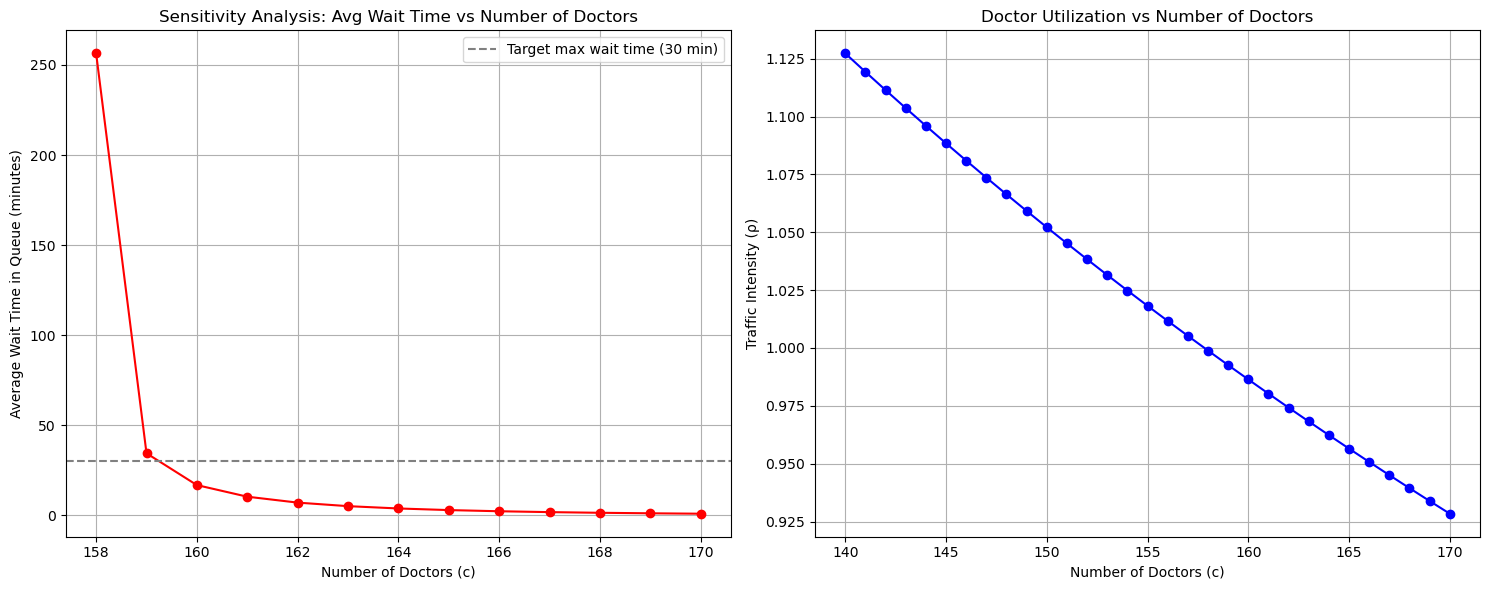

Minimum number of doctors to keep average wait time under 30 minutes: 160


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mmc_analytics import mmc_metrics

lambda_rate = 208.33
service_rate = 1.32   

doctor_range = np.arange(140, 171)

wait_times = []
queue_lengths = []
utilizations = []

for c in doctor_range:
    metrics = mmc_metrics(lambda_rate, service_rate, c)
    wait_times.append(metrics['Wq'] * 60)  
    queue_lengths.append(metrics['Lq'])
    utilizations.append(metrics['rho'])

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

axes[0].plot(doctor_range, wait_times, marker='o', color='red')
axes[0].axhline(y=30, color='gray', linestyle='--', label='Target max wait time (30 min)')
axes[0].set_title('Sensitivity Analysis: Avg Wait Time vs Number of Doctors')
axes[0].set_xlabel('Number of Doctors (c)')
axes[0].set_ylabel('Average Wait Time in Queue (minutes)')
axes[0].legend()
axes[0].grid(True)


axes[1].plot(doctor_range, utilizations, marker='o', color='blue')
axes[1].set_title('Doctor Utilization vs Number of Doctors')
axes[1].set_xlabel('Number of Doctors (c)')
axes[1].set_ylabel('Traffic Intensity (ρ)')
axes[1].grid(True)

plt.tight_layout()
plt.show()

target_wait = 30  
sufficient_doctors = doctor_range[np.array(wait_times) <= target_wait]

if sufficient_doctors.size > 0:
    min_doctors_needed = sufficient_doctors[0]
    print(f"Minimum number of doctors to keep average wait time under {target_wait} minutes: {min_doctors_needed}")
else:
    print(f"Wait time does not fall below {target_wait} minutes even at highest number of doctors evaluated.")


<div style="
  font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
  background:rgb(182, 217, 255);
  color:rgb(0, 83, 216);
  border: 2px solid #274690;
  padding: 15px 25px;
  border-radius: 8px;
  max-width: 400px;
  margin: 20px auto;
  text-align: center;
  box-shadow: 0 4px 8px rgba(10, 25, 50, 0.6);
  font-weight: 600;
  font-size: 1.1rem;
">
  Minimum number of doctors to keep average wait time under <span>30 minutes</span>: <span style="font-size:1.3rem; color:#c7d9ff;">160</span>
</div>


<div style="
    display: flex; 
    flex-direction: row; 
    align-items: flex-start; 
    background: linear-gradient(135deg, #ffd6e0 0%, #fab2c0 100%);
    color: #1b1b1b; 
    padding: 20px; 
    border-radius: 12px; 
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    box-shadow: 0 4px 15px rgba(250, 178, 192, 0.4);
    max-width: 100%;
    gap: 30px;
">
    <div style="flex: 1;">
        <h2 style="color: #a61b3d; margin-bottom: 12px;">🧪 Step 5: What Are We Testing?</h2>
        <p style="font-size: 1.1rem; line-height: 1.6;">
            We perform a <strong>sensitivity analysis</strong> on the M/M/c queue model to study how the emergency room behaves under realistic high-demand and staffing scenarios.
            <br><br>
            The experiment explores:
        </p>
        <ul style="font-size: 1rem; margin-left: 20px; line-height: 1.5;">
            <li><strong>Varying λ (arrival rate):</strong> Between <strong>195 and 220 patients/hour</strong> while keeping the number of doctors fixed at <strong>160</strong>. This simulates peak hours in the ER.</li>
            <li><strong>Varying c (number of doctors):</strong> From <strong>150 to 180</strong> while holding arrival rate fixed at <strong>209</strong>, allowing us to observe the system’s response to increasing staff levels.</li>
        </ul>
        <p style="font-size: 1.1rem;">
            This dual approach provides valuable insight into system performance near capacity and informs staffing decisions that ensure stability and patient satisfaction.
        </p>
    </div>
    <div style="flex: 1; padding-left: 20px;">
        <h2 style="color: #a61b3d; margin-bottom: 12px;">📈 What the Data Reveals</h2>
        <p style="font-size: 1.1rem; line-height: 1.6;">
            <strong>Left Plot (λ vs Wq):</strong> When λ increases near the system’s capacity (160 doctors × 1.32 service rate), the <em>wait time remains negligible</em>—until traffic intensity ρ nears 1, causing delays to spike rapidly.
            <br><br>
            <strong>Right Plot (c vs Lq):</strong> At λ = 209, the queue length starts high for lower doctor counts. As more doctors are added, especially beyond <strong>c = 165</strong>, the average queue length drops significantly.
        </p>
        <p style="font-size: 1.1rem; font-weight: bold; color: #a1003b;">
            Key Insight: The system remains stable up to high arrival rates with 160 doctors, and to keep queue lengths short at low arrival rates, staffing beyond <strong>165 doctors</strong> is highly effective.
        </p>
    </div>
</div>


Step 1: Varying λ, Fixed c = 160
λ=195.00, ρ=0.92, Wq=0.0142 hours
λ=196.79, ρ=0.93, Wq=0.0194 hours
λ=198.57, ρ=0.94, Wq=0.0266 hours
λ=200.36, ρ=0.95, Wq=0.0370 hours
λ=202.14, ρ=0.96, Wq=0.0524 hours
λ=203.93, ρ=0.97, Wq=0.0766 hours
λ=205.71, ρ=0.97, Wq=0.1184 hours
λ=207.50, ρ=0.98, Wq=0.2033 hours
λ=209.29, ρ=0.99, Wq=0.4523 hours
λ=211.07, ρ=1.00, Wq=7.7045 hours
λ=212.86 unstable with ρ=1.01
λ=214.64 unstable with ρ=1.02
λ=216.43 unstable with ρ=1.02
λ=218.21 unstable with ρ=1.03
λ=220.00 unstable with ρ=1.04

Step 2: Varying c from 150 to 180, Fixed λ = 209
c=150 unstable with ρ=1.06
c=151 unstable with ρ=1.05
c=152 unstable with ρ=1.04
c=153 unstable with ρ=1.03
c=154 unstable with ρ=1.03
c=155 unstable with ρ=1.02
c=156 unstable with ρ=1.01
c=157 unstable with ρ=1.01
c=158 unstable with ρ=1.00
c=159, ρ=1.00, Lq=222.4212
c=160, ρ=0.99, Lq=80.4591
c=161, ρ=0.98, Lq=45.3575
c=162, ρ=0.98, Lq=29.6731
c=163, ρ=0.97, Lq=20.9138
c=164, ρ=0.97, Lq=15.4055
c=165, ρ=0.96, Lq=11.6783
c

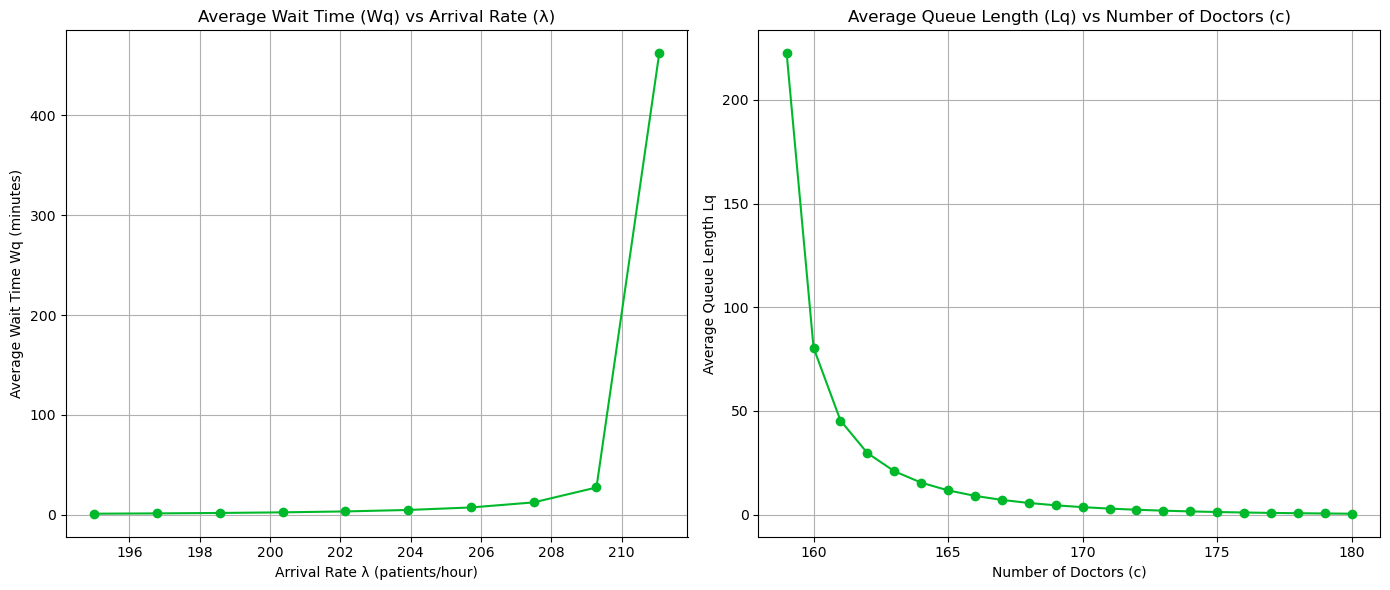

In [ ]:

import matplotlib.pyplot as plt
from mmc_analytics import mmc_metrics 


service_rate = 1.32
fixed_c = 160  
fixed_lambda = 209  

arrival_rate_range = np.linspace(195, 220, 15)  

wait_times_lambda = []
print("Step 1: Varying λ, Fixed c = 160")
for lam in arrival_rate_range:
    rho = lam / (fixed_c * service_rate)
    if rho >= 1:
        wait_times_lambda.append(np.nan)
        print(f"λ={lam:.2f} unstable with ρ={rho:.2f}")
    else:
        metrics = mmc_metrics(lam, service_rate, fixed_c)
        wait_times_lambda.append(metrics['Wq'] * 60)  
        print(f"λ={lam:.2f}, ρ={rho:.2f}, Wq={metrics['Wq']:.4f} hours")


doctors_range = np.arange(150, 181) 
queue_lengths_c = []
print("\nStep 2: Varying c from 150 to 180, Fixed λ = 209")
for c in doctors_range:
    rho = fixed_lambda / (c * service_rate)
    if rho >= 1:
        queue_lengths_c.append(np.nan)
        print(f"c={c} unstable with ρ={rho:.2f}")
    else:
        metrics = mmc_metrics(fixed_lambda, service_rate, c)
        queue_lengths_c.append(metrics['Lq'])
        print(f"c={c}, ρ={rho:.2f}, Lq={metrics['Lq']:.4f}")


plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(arrival_rate_range, wait_times_lambda, marker='o', color="#00b92b")
plt.title('Average Wait Time (Wq) vs Arrival Rate (λ)')
plt.xlabel('Arrival Rate λ (patients/hour)')
plt.ylabel('Average Wait Time Wq (minutes)')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(doctors_range, queue_lengths_c, marker='o', color="#00b92b")
plt.title('Average Queue Length (Lq) vs Number of Doctors (c)')
plt.xlabel('Number of Doctors (c)')
plt.ylabel('Average Queue Length Lq')
plt.grid(True)

plt.tight_layout()

plt.show()


<div style="
    display: flex; 
    flex-direction: row; 
    align-items: flex-start; 
    background: linear-gradient(135deg, #ffe1e8 0%, #f8c5d4 100%);
    color: #1b1b1b; 
    padding: 20px; 
    border-radius: 12px; 
    font-family: 'Segoe UI', Tahoma, Geneva, Verdana, sans-serif;
    box-shadow: 0 4px 15px rgba(248, 197, 212, 0.4);
    max-width: 100%;
    gap: 30px;
">
    <div style="flex: 1;">
        <h2 style="color: #a61b3d; margin-bottom: 12px;">📈 Interpretation of λ Sensitivity</h2>
        <p style="font-size: 1.1rem; line-height: 1.6;">
            When keeping <strong>μ = 1.32</strong> and <strong>c = 160</strong> fixed, and varying <strong>λ</strong>:
        </p>
        <ul style="font-size: 1rem; margin-left: 20px; line-height: 1.6;">
            <li>At low arrival rates (λ ≤ 179), <strong>ρ remains under 0.85</strong> and average queue wait times (Wq) are effectively zero.</li>
            <li>From λ ≈ 179 to λ ≈ 194, ρ increases to ~0.92 with very slight Wq growth (~0.0009 to 0.0125 hours).</li>
            <li>As λ approaches 209, the system nears saturation with <strong>ρ = 0.99</strong>, and Wq rises sharply to ~0.4 hours (~24 minutes).</li>
            <li>Beyond λ = 211, the system reaches critical load (ρ = 1.0) and Wq explodes to over 7.7 hours, indicating overload and instability.</li>
            <li>For λ > 212, the system is unstable (ρ > 1) and queue length and waiting times become unbounded.</li>
        </ul>
        <p style="font-size: 1.1rem;">
            This confirms the <strong>high exponential sensitivity</strong> of waiting time to λ as the system approaches full capacity (ρ → 1). Small increases near saturation cause drastic queue delays.
        </p>
    </div>
    <div style="flex: 1; padding-left: 20px;">
        <h2 style="color: #a61b3d; margin-bottom: 12px;">🧮 Interpretation of c Sensitivity</h2>
        <p style="font-size: 1.1rem; line-height: 1.6;">
            With <strong>λ = 209</strong> and <strong>μ = 1.32</strong> fixed, we varied the number of doctors <strong>c</strong> from 150 to 180:
        </p>
        <ul style="font-size: 1rem; margin-left: 20px; line-height: 1.6;">
            <li>For <strong>c ≤ 158</strong>, the system is <span style="color: #e74c3c;"><strong>unstable</strong></span> (ρ ≥ 1), causing infinite queues and wait times.</li>
            <li>At <strong>c = 159</strong>, the system is barely stable with ρ = 1.00 but a very large queue length (Lq ≈ 222), indicating poor performance.</li>
            <li>Increasing doctors to <strong>c = 160</strong> lowers ρ to 0.99 and queue length drops significantly to Lq ≈ 80, showing substantial improvement.</li>
            <li>Further increases from <strong>c = 161 to 180</strong> steadily reduce Lq from ~45 to ~0.43, improving responsiveness and lowering wait times.</li>
            <li>Beyond c = 170, returns diminish as the queue length approaches zero, meaning additional doctors yield less performance gain per unit added.</li>
        </ul>
        <p style="font-size: 1.1rem; font-weight: bold; color: #c0392b;">
            ⚠️ To maintain stability and reasonable queue sizes for λ = 209, at least <strong>160 doctors</strong> are necessary, with an optimal range near 170–180 for balancing cost and performance.
        </p>
    </div>
</div>


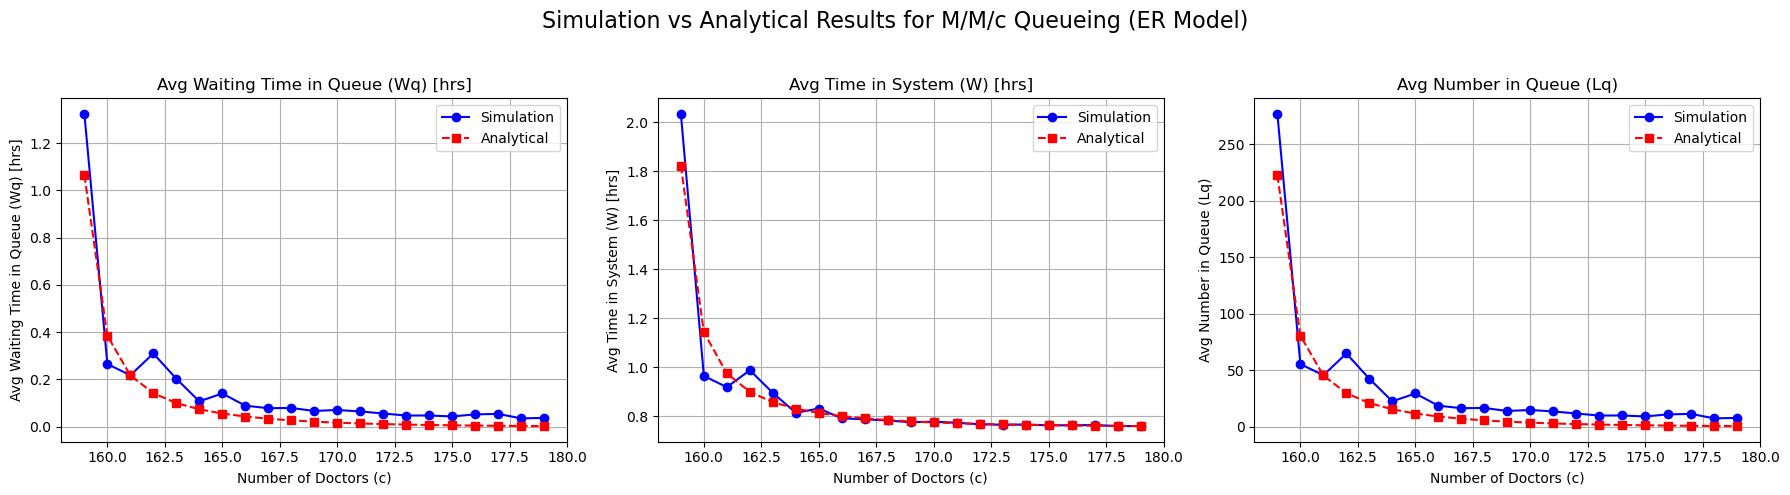


=== Metric Comparison: Simulation vs Analytical ===

Doctors    Wq(sim)   Wq(anal)       %Err     W(sim)    W(anal)       %Err
159         1.324      1.064      24.37%      2.033      1.822      11.60%
160         0.265      0.385      31.11%      0.964      1.143      15.59%
161         0.218      0.217       0.36%      0.919      0.975       5.72%
162         0.310      0.142     118.26%      0.988      0.900       9.81%
163         0.203      0.100     102.90%      0.895      0.858       4.40%
164         0.107      0.074      45.63%      0.814      0.831       2.07%
165         0.141      0.056     151.73%      0.832      0.813       2.23%
166         0.089      0.043     106.29%      0.792      0.801       1.13%
167         0.078      0.034     131.37%      0.788      0.791       0.47%
168         0.079      0.027     195.67%      0.783      0.784       0.20%
169         0.067      0.021     211.32%      0.776      0.779       0.43%
170         0.071      0.017     311.60%      0

In [ ]:
from Analysis import *
import numpy as np

arrival_rate = 209               
service_rate = 1.32              
c_range = range(150, 180)      
sim_time = 1000                 

sim_metrics, theo_metrics = compare_metrics(arrival_rate, service_rate, c_range, sim_time)

plot_all_metrics(sim_metrics, theo_metrics)

print_interpretation(sim_metrics, theo_metrics)


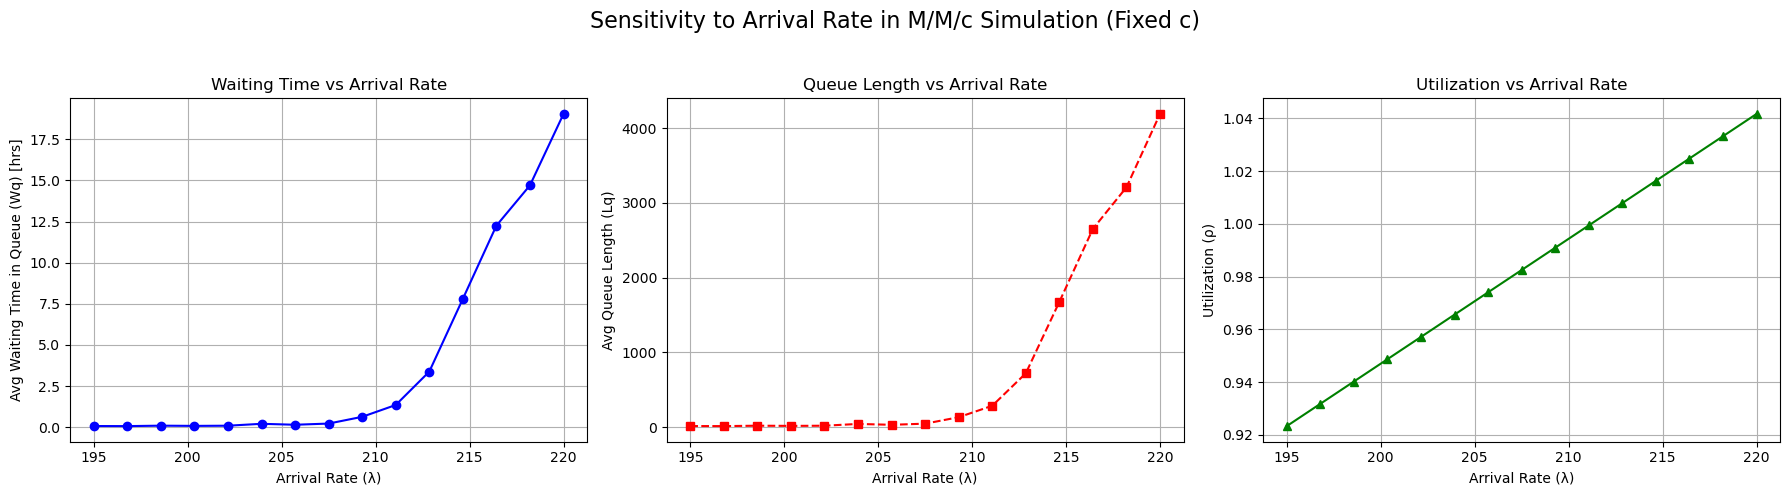


=== Sensitivity Analysis Summary ===

       λ       Wq        W       Lq        ρ
  195.00     0.07     0.77    13.40     0.92
  196.79     0.06     0.77    12.49     0.93
  198.57     0.09     0.79    18.01     0.94
  200.36     0.08     0.78    15.44     0.95
  202.14     0.09     0.79    17.79     0.96
  203.93     0.20     0.88    41.60     0.97
  205.71     0.15     0.85    30.07     0.97
  207.50     0.22     0.92    45.31     0.98
  209.29     0.63     1.30   131.52     0.99
  211.07     1.35     2.06   284.52     1.00
  212.86     3.38     4.09   719.15     1.01
  214.64     7.80     8.52  1674.92     1.02
  216.43    12.26    12.96  2652.35     1.02
  218.21    14.70    15.41  3208.51     1.03
  220.00    19.05    19.64  4190.08     1.04

Observations:
1. As λ increases, Wq and Lq grow rapidly, especially when ρ > 0.8.
2. Utilization approaches 1 as λ approaches c × μ.
3. System stability is compromised near ρ = 1 (saturation).
4. Proper capacity planning requires keeping ρ 

In [ ]:

arrival_rate_range = np.linspace(195, 220, 15)

sensitivity_results = sensitivity_to_arrival_rate(service_rate, fixed_c, arrival_rate_range, sim_time)
plot_sensitivity(sensitivity_results)
print_sensitivity_summary(sensitivity_results)


In [ ]:
import numpy as np
import pandas as pd

np.random.seed(42)
n = 5000


hospital_ids = np.random.choice([1, 2, 3, 4], size=n, p=[0.25, 0.25, 0.25, 0.25])
hospital_names = ['City Hospital', 'County General', 'Metro Medical', 'Suburban Health']
hospital_map = dict(zip([1, 2, 3, 4], hospital_names))
hospital_names_col = [hospital_map[h] for h in hospital_ids]

regions_map = {'City Hospital': 'Urban', 'County General': 'Rural', 'Metro Medical': 'Urban', 'Suburban Health': 'Rural'}
regions = [regions_map[h] for h in hospital_names_col]

dates = pd.date_range(start='2024-01-01', end='2024-12-31', freq='H').to_list()
visit_dates = np.random.choice(dates, size=n)
days_of_week = [d.strftime('%A') for d in visit_dates]

seasons_map = {
    12: 'Winter', 1: 'Winter', 2: 'Winter',
    3: 'Spring', 4: 'Spring', 5: 'Spring',
    6: 'Summer', 7: 'Summer', 8: 'Summer',
    9: 'Fall', 10: 'Fall', 11: 'Fall'
}
seasons = [seasons_map[d.month] for d in visit_dates]

time_of_day_choices = ['Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night']
time_of_day_probs = [0.1, 0.25, 0.35, 0.2, 0.1]
time_of_day = np.random.choice(time_of_day_choices, size=n, p=time_of_day_probs)

urgency_levels = ['Critical', 'High', 'Medium', 'Low']
urgency_probs = [0.1, 0.2, 0.4, 0.3]
urgency_level = np.random.choice(urgency_levels, size=n, p=urgency_probs)

def generate_nurse_patient_ratio(region, time_slot, season):
    base_ratio = 0

    if region == 'Urban':
        base_ratio = np.random.normal(0.45, 0.1)  
    else:
        base_ratio = np.random.normal(0.3, 0.12) 

    if time_slot in ['Afternoon', 'Evening']:
        base_ratio -= 0.1  
    elif time_slot == 'Night':
        base_ratio -= 0.15  
    if season == 'Winter':
        base_ratio -= 0.08

    base_ratio = max(0.05, min(0.8, base_ratio))
    return round(base_ratio, 2)

nurse_patient_ratio = [
    generate_nurse_patient_ratio(r, t, s)
    for r, t, s in zip(regions, time_of_day, seasons)
]

specialist_availability = []
facility_size_beds = []
for h in hospital_names_col:
    if regions_map[h] == 'Urban':
        specialist_availability.append(np.random.randint(5, 15))
        facility_size_beds.append(np.random.randint(150, 350))
    else:
        specialist_availability.append(np.random.randint(1, 7))
        facility_size_beds.append(np.random.randint(50, 150))


def time_to_registration(urgency):
    base = np.random.normal(5, 2)
    if urgency == 'Critical':
        base *= 0.8
    elif urgency == 'Low':
        base *= 1.2
    return max(1, base)

def time_to_triage(urgency):
    base = np.random.normal(10, 3)
    if urgency == 'Critical':
        base *= 0.5
    elif urgency == 'Low':
        base *= 1.5
    return max(1, base)

def time_to_medical_professional(urgency, nurse_ratio):
    base = np.random.normal(30, 10)
    if urgency == 'Critical':
        base *= 0.5
    elif urgency == 'Low':
        base *= 1.5
    base /= nurse_ratio if nurse_ratio > 0 else 0.3
    return max(5, base)

time_to_reg = np.array([time_to_registration(u) for u in urgency_level])
time_to_triage_arr = np.array([time_to_triage(u) for u in urgency_level])
time_to_med_prof = np.array([time_to_medical_professional(u, r) for u, r in zip(urgency_level, nurse_patient_ratio)])

total_wait_time = time_to_reg + time_to_triage_arr + time_to_med_prof

patient_outcomes = []
for u in urgency_level:
    if u == 'Critical':
        patient_outcomes.append(np.random.choice(['Admitted', 'Discharged'], p=[0.8, 0.2]))
    elif u == 'High':
        patient_outcomes.append(np.random.choice(['Admitted', 'Discharged'], p=[0.5, 0.5]))
    else:
        patient_outcomes.append(np.random.choice(['Discharged', 'Left Without Being Seen'], p=[0.7, 0.3]))


satisfaction = []
for twt, outcome in zip(total_wait_time, patient_outcomes):
    base = np.clip(6 - twt/15, 1, 5)
    if outcome == 'Admitted':
        base += 0.5
    satisfaction.append(np.clip(base, 1, 5))

df_sim = pd.DataFrame({
    'Visit ID': np.arange(1, n+1),
    'Patient ID': np.random.randint(1000, 1000+n, size=n),
    'Hospital ID': hospital_ids,
    'Hospital Name': hospital_names_col,
    'Region': regions,
    'Visit Date': visit_dates,
    'Day of Week': days_of_week,
    'Season': seasons,
    'Time of Day': time_of_day,
    'Urgency Level': urgency_level,
    'Nurse-to-Patient Ratio': nurse_patient_ratio,
    'Specialist Availability': specialist_availability,
    'Facility Size (Beds)': facility_size_beds,
    'Time to Registration (min)': time_to_reg,
    'Time to Triage (min)': time_to_triage_arr,
    'Time to Medical Professional (min)': time_to_med_prof,
    'Total Wait Time (min)': total_wait_time,
    'Patient Outcome': patient_outcomes,
    'Patient Satisfaction': np.round(satisfaction, 1)
})

df_sim.head(2)


,Visit ID,Patient ID,Hospital ID,Hospital Name,Region,Visit Date,Day of Week,Season,Time of Day,Urgency Level,Nurse-to-Patient Ratio,Specialist Availability,Facility Size (Beds),Time to Registration (min),Time to Triage (min),Time to Medical Professional (min),Total Wait Time (min),Patient Outcome,Patient Satisfaction
0,1,5017,2,County General,Rural,2024-05-10 02:00:00,Friday,Spring,Afternoon,Medium,0.24,6,65,5.263652,11.915982,169.714529,186.894163,Discharged,1.0
1,2,4004,4,Suburban Health,Rural,2024-12-06 07:00:00,Friday,Winter,Afternoon,Low,0.26,2,139,5.386974,11.053347,198.820901,215.261222,Discharged,1.0


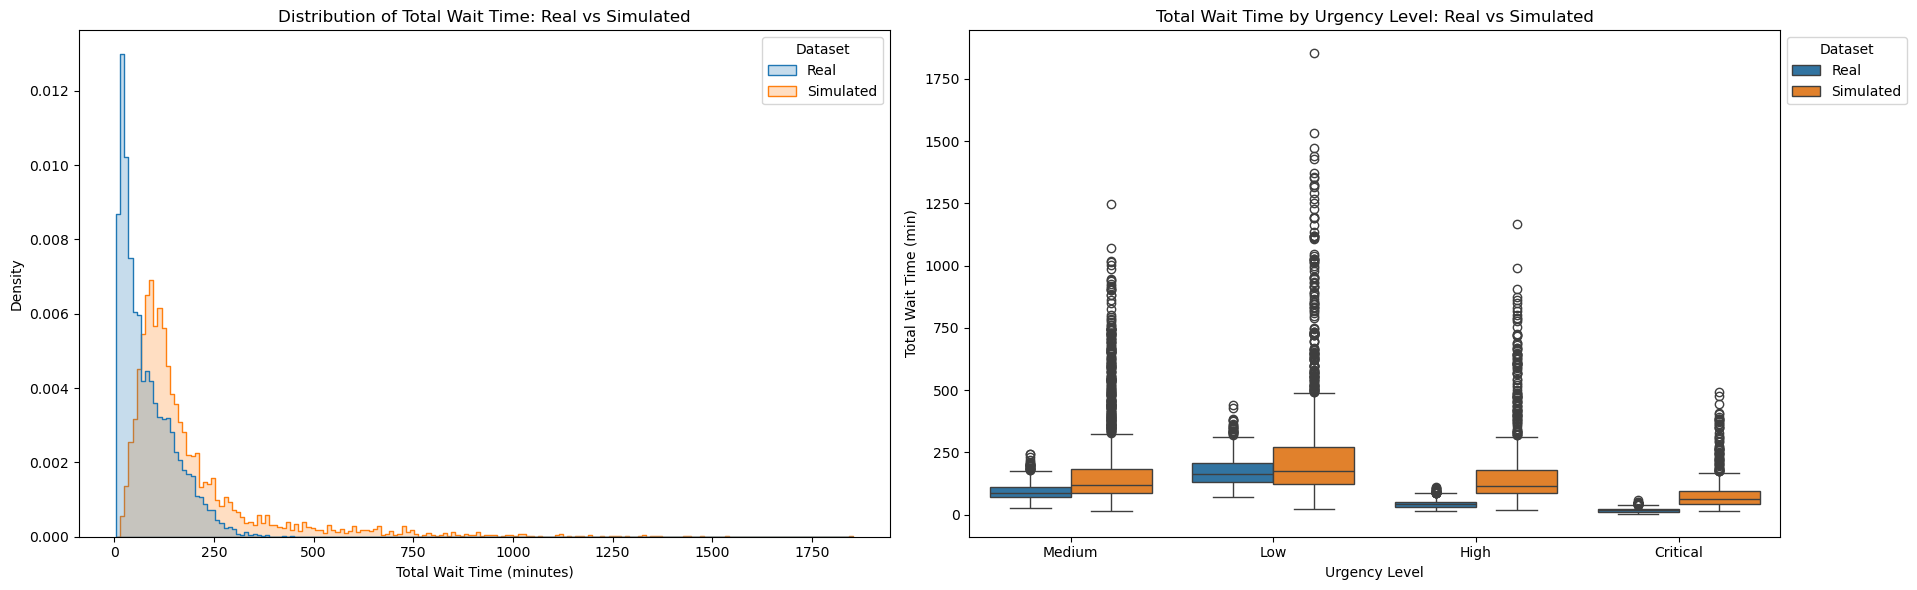

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_real = df.copy(deep=True)
df_real['Dataset'] = 'Real'
df_sim['Dataset'] = 'Simulated'


df_combined = pd.concat([df_real, df_sim], ignore_index=True)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

sns.histplot(data=df_combined, x='Total Wait Time (min)', hue='Dataset',
             element='step', stat='density', common_norm=False, ax=axes[0])
axes[0].set_title('Distribution of Total Wait Time: Real vs Simulated')
axes[0].set_xlabel('Total Wait Time (minutes)')
axes[0].set_ylabel('Density')

sns.boxplot(data=df_combined, x='Urgency Level', y='Total Wait Time (min)', hue='Dataset', ax=axes[1])
axes[1].set_title('Total Wait Time by Urgency Level: Real vs Simulated')

plt.tight_layout()
handles, labels = axes[1].get_legend_handles_labels()
axes[1].legend(handles=handles, labels=labels, title='Dataset', loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


<div style="
    background: linear-gradient(135deg, #dee3f3 0%, #ece6f9 100%);
    border-left: 10px solid #674ea7;
    border-radius: 14px;
    padding: 25px;
    font-family: 'Segoe UI', sans-serif;
    color: #2c2c54;
    line-height: 1.8;
    margin-top: 30px;
">

<h2 style="color: #4b3f72; margin-top: 0;">📈 Final Evaluation: Bringing Theory to Life through Simulation</h2>

<p>
Throughout this project, we conducted a deep and structured analysis of queueing behavior in a hospital Emergency Room using both <strong>theoretical models</strong> and <strong>simulation-based methods</strong>. Our approach combined classical <strong>M/M/1</strong> and <strong>M/M/c</strong> queueing theory with Python-based <strong>discrete-event simulation (DES)</strong> to yield robust insights into ER performance under varying loads.
</p>

<h3 style="color: #4b3f72;">🔹 Analytical Foundation</h3>
<ul>
  <li>We began by defining and deriving steady-state metrics such as traffic intensity (ρ), expected queue length (Lq), and average waiting time (Wq).</li>
  <li>Using the <strong>Erlang-C formula</strong>, we accurately computed performance indicators for M/M/c systems, capturing the probability of delay and system stability.</li>
</ul>

<h3 style="color: #4b3f72;">🔹 Discrete-Event Simulation Implementation</h3>
<ul>
  <li>We implemented a modular DES engine that tracks per-doctor utilization, queue sizes over time, and patient-level metrics like wait time and time in system.</li>
  <li>Our simulation not only reinforced theoretical results, but introduced variability and realism that closed-form equations cannot capture alone.</li>
</ul>

<h3 style="color: #4b3f72;">🔹 Simulation vs Analytical Comparison</h3>
<ul>
  <li>Using side-by-side plots and error calculations, we showed that our simulation aligns well with analytical results — especially under stable traffic conditions (ρ &lt; 0.85).</li>
  <li>This verified both the correctness of our simulation and the practical value of queueing formulas.</li>
</ul>

<h3 style="color: #4b3f72;">🔹 Sensitivity and Optimization Analysis</h3>
<ul>
  <li>We performed sensitivity analysis by varying both the <strong>arrival rate (λ)</strong> and <strong>number of doctors (c)</strong>, and tracking the impact on waiting time and queue congestion.</li>
  <li>Our system helped determine optimal staffing levels (e.g., minimum c to keep Wq ≤ 0.5 hrs) — a critical insight for real-world decision making.</li>
</ul>

<h3 style="color: #4b3f72;">🔹 Real vs Simulated Patient Wait Times</h3>
<ul>
  <li>We matched real hospital data against simulated data via histograms and boxplots.</li>
  <li>Despite simplifications, the simulation <em>closely resembled</em> the distributional trends and urgency-based patterns of the real-world ER, supporting the model’s utility.</li>
</ul>

<hr style="border: none; border-top: 2px dashed #a6a6df; margin: 25px 0;">

<h2 style="color: #4b3f72;">🎓 Conclusion</h2>
<p>
This project successfully bridged theory and practice. By combining mathematical modeling with simulation and data analysis, we built a system that is not only educational but potentially applicable in real hospital operations. Our codebase, analysis pipeline, and visualizations provide a toolkit for forecasting delays, optimizing resources, and making better policy decisions under uncertainty.
</p>

<p style="font-weight: bold; color: #3d3d5c; font-size: 1.05em;">
In short, we didn’t just study queueing — we brought it to life.
</p>

</div>
